#### Датасет содержит информацию о характеристиках ноутбуков, включая бренд, параметры процессора, объем оперативной памяти, тип накопителя (SSD/HDD), операционную систему, объем видеопамяти, вес, гарантию, наличие сенсорного экрана, наличие MS Office, цену, рейтинг, количество оценок и отзывов. Всего в датасете 823 записи и 19 столбцов.
- Выполнил: Калмацкий Арсен Николаевич

# Имопорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

# Загрузка данных

In [4]:
df = pd.read_csv("laptopPrice.csv")

# Вывод данных

In [6]:
df.head(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


# Анализ данных

- brand - Бренд
- processor_brand - Бренд процессора
- processor_name - Модель процессора
- processor_gnrtn - Поколение процессора
- ram_gb - Объем оперативной памяти (ГБ)
- ram_type - Тип оперативной памяти
- ssd - Объем SSD-накопителя (ГБ)
- hdd - Объем HDD-накопителя (ГБ)
- os - Операционная система
- os_bit - Разрядность операционной системы
- graphic_card_gb - Объем видеопамяти (ГБ)
- weight - Вес ноутбука
- warranty - Гарантия
- Touchscreen - Наличие сенсорного экрана
- msoffice - Наличие MS Office
- Price - Цена
- rating - Рейтинг
- Number of Ratings - Количество оценок
- Number of Reviews - Количество отзывов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

#### Здесь мы наблюдаем что датафрейм содержит 823 строки и 19 признаков. Большинство столбцов имеют тип "object".

In [11]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


#### Представленные данные не содержат явных аномалий, а лишь отражают широкий диапазон характеристик ноутбуков

In [13]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

#### В данном датафрейме пропусков не наблюдается

In [15]:
df.duplicated().sum()

21

#### В данном датафрейме наблюдается 21 дубликат, позже мы их удалим

# Нормализация данных

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.drop(columns=['warranty', 'msoffice', "weight"], inplace=True)
# удаление не нужных столбцов

In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [21]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,touchscreen,price,rating,number_of_ratings,number_of_reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,No,26990,3 stars,0,0


#### Переработка и округление до целых чисел данные

In [23]:
rating_map = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5
}
df['rating'] = df['rating'].map(rating_map)
# Заполнение NaN значений для рейтингов и количества
df['rating'] = df['rating'].fillna(0).astype(int)
df['number_of_ratings'] = df['number_of_ratings'].fillna(0).astype(int)
df['number_of_reviews'] = df['number_of_reviews'].fillna(0).astype(int)

# Функция для конвертации строковых значений в числовые
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(' GB', '').replace(' ', '')  # Убираем 'GB' и пробелы
        try:
            return float(value)
        except ValueError:
            return 0.0
    return float(value) if isinstance(value, (int, float)) else 0.0

# Применяем функцию ко всем нужным столбцам
df['ram_gb'] = df['ram_gb'].apply(convert_to_numeric)
df['ssd'] = df['ssd'].apply(convert_to_numeric)
df['hdd'] = df['hdd'].apply(convert_to_numeric)
df['graphic_card_gb'] = df['graphic_card_gb'].apply(convert_to_numeric)

# Преобразование в int, где это применимо (стоимость и рейтинг)
df['price'] = df['price'].fillna(0).astype(int)  # Заполнение NaN и преобразование к int

In [24]:
df["brand"].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [25]:
brand_map = {
    'ASUS': 101, 
    'Lenovo': 102, 
    'acer': 103, 
    'Avita': 104, 
    'HP': 105, 
    'DELL': 106, 
    'MSI': 107, 
    'APPLE': 108
}
df['brand'] = df['brand'].map(brand_map)

In [26]:
df["processor_brand"].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [27]:
proccessor_map = {
    'Intel': 201, 
    'AMD': 202, 
    'M1': 203, 
}
df['processor_brand'] = df['processor_brand'].map(proccessor_map)

In [28]:
df["processor_name"].unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

In [30]:
proccessor_name_map = {
    'Core i3': 301, 
    'Core i5': 302, 
    'Celeron Dual': 303, 
    'Ryzen 5': 304, 
    'Core i7': 305,
    'Core i9': 306, 
    'M1': 307, 
    'Pentium Quad': 308, 
    'Ryzen 3': 309, 
    'Ryzen 7': 310, 
    'Ryzen 9': 311
}
df['processor_name'] = df['processor_name'].map(proccessor_name_map)

In [31]:
df["processor_gnrtn"].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [33]:
processor_gnrtn_map = {
    '10th': 10,
    'Not Available': 0,
    '11th': 11,
    '7th': 7,
    '8th': 8,
    '9th': 9,
    '4th': 4,
    '12th': 12
}
df['processor_gnrtn'] = df['processor_gnrtn'].map(processor_gnrtn_map)

In [34]:
df["ram_type"].unique()

array(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],
      dtype=object)

In [35]:
ram_map = {
    'DDR4': 4,
    'LPDDR4': 44,
    'LPDDR4X': 444,
    'DDR5': 5,
    'DDR3': 3,
    'LPDDR3': 33
}
df["ram_type"] = df["ram_type"].map(ram_map)

In [37]:
df["os"].unique()

array(['Windows', 'DOS', 'Mac'], dtype=object)

In [38]:
os_map = {
    'Windows': 1,
    'DOS': 2,
    'Mac': 3,
}
df["os"] = df["os"].map(os_map)

In [41]:
df["os_bit"].unique()

array(['64-bit', '32-bit'], dtype=object)

In [42]:
os_bit_map = {
    '64-bit': 64,
    '32-bit': 32,
}
df["os_bit"] = df["os_bit"].map(os_bit_map)

In [44]:
df["touchscreen"].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
touchscreen_map = {
    'No': 0,
    'Yes': 1,
}
df["touchscreen"] = df["touchscreen"].map(touchscreen_map)

In [60]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,touchscreen,price,rating,number_of_ratings,number_of_reviews
0,101,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,34649,2,3,0
1,102,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,38999,3,65,5
2,102,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,39999,3,8,1
3,101,201,302,10,8.0,4,512.0,0.0,1,32,2.0,0,69990,3,0,0
4,101,201,303,0,4.0,4,0.0,512.0,1,64,0.0,0,26990,3,0,0


In [69]:
df.dtypes

brand                  int64
processor_brand        int64
processor_name         int64
processor_gnrtn        int64
ram_gb               float64
ram_type               int64
ssd                  float64
hdd                  float64
os                     int64
os_bit                 int64
graphic_card_gb      float64
touchscreen            int64
price                  int32
rating                 int32
number_of_ratings      int32
number_of_reviews      int32
dtype: object

# Анализ данных

array([[<Axes: title={'center': 'brand'}>,
        <Axes: title={'center': 'processor_brand'}>,
        <Axes: title={'center': 'processor_name'}>,
        <Axes: title={'center': 'processor_gnrtn'}>],
       [<Axes: title={'center': 'ram_gb'}>,
        <Axes: title={'center': 'ram_type'}>,
        <Axes: title={'center': 'ssd'}>, <Axes: title={'center': 'hdd'}>],
       [<Axes: title={'center': 'os'}>,
        <Axes: title={'center': 'os_bit'}>,
        <Axes: title={'center': 'graphic_card_gb'}>,
        <Axes: title={'center': 'touchscreen'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'number_of_ratings'}>,
        <Axes: title={'center': 'number_of_reviews'}>]], dtype=object)

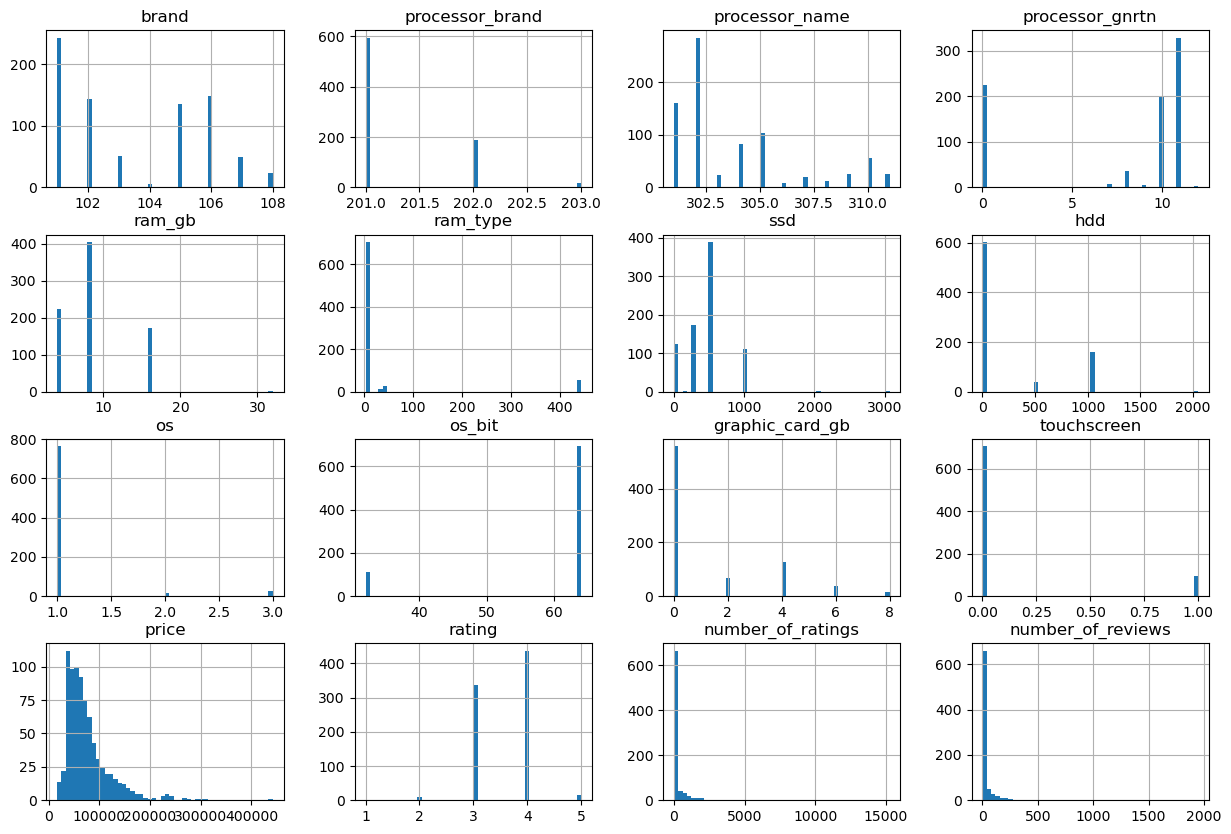

In [73]:
df.hist(figsize = (15,10), bins = 50)

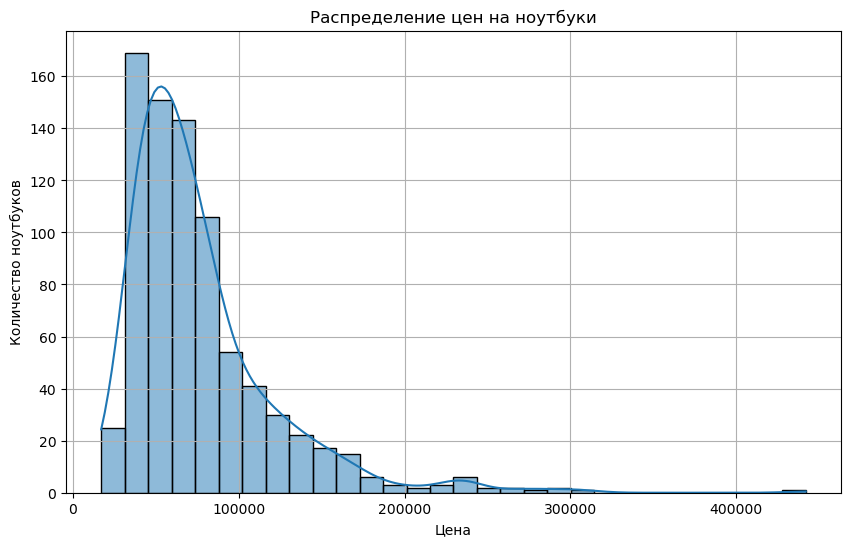

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена')
plt.ylabel('Количество ноутбуков')
plt.grid(True)
plt.show()

#### Здесь мы наблюдаем чем больше у нас ноутбуков тем ниже их цена и наоборот чем меньше ноутбуков тем больше их цена

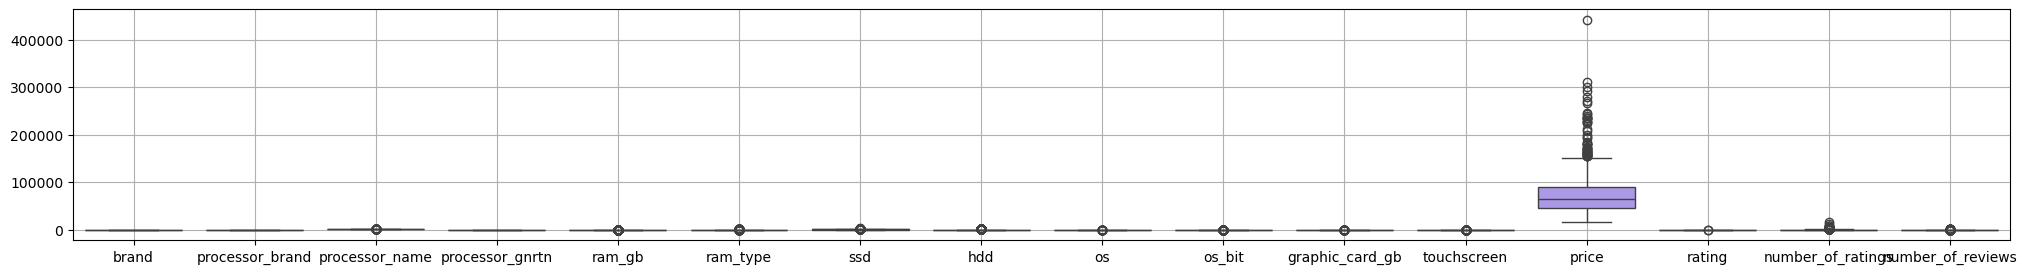

In [76]:
plt.figure(figsize=(25, 3))
sns.boxplot(data=df)
plt.grid(True)
plt.show()

#### Цена является единственным параметром с заметным распределением. Для большинства других характеристик (например, brand, processor_brand, ram_gb, os, и т.д.) распределение либо слишком узкое, либо значения практически одинаковы

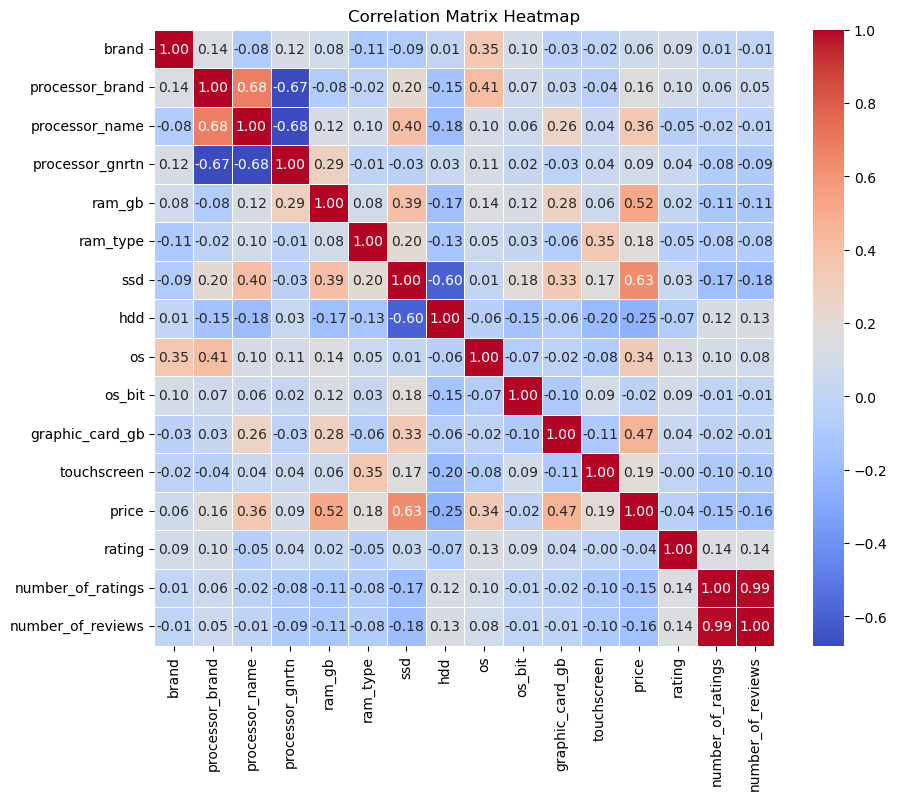

In [78]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Есть зависимости между processor_gnrtn и price (0.63),ram_gb и price (0.56), graphic_card_gb и price (0.47), number_of_ratings и number_of_reviews (0.99), есть и отрицательные зависимости ssd и hdd (-0.60)

# Кластерезация (K-means)

In [586]:
# Выбор признаков для кластеризации
features = df[['ram_gb', 'ssd', 'hdd', 'number_of_ratings', 'price', 'processor_gnrtn', 'graphic_card_gb', 'os_bit', 'touchscreen']]
# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

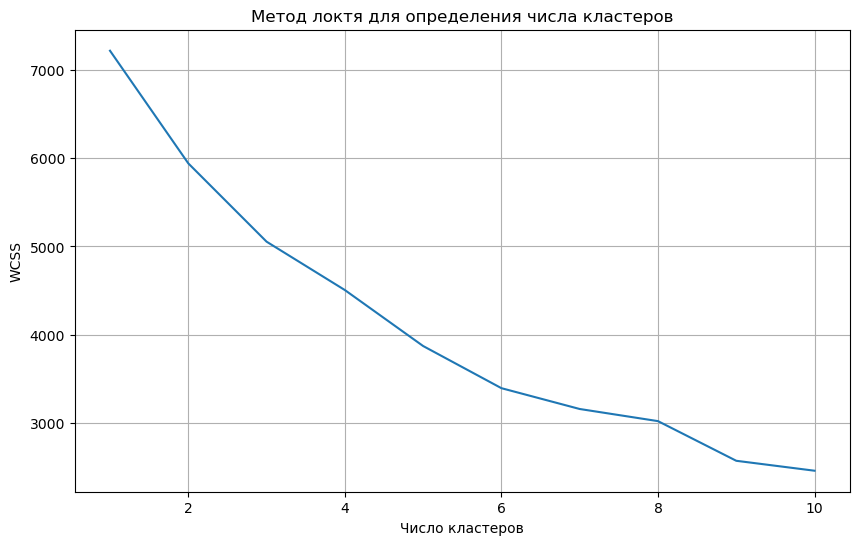

In [587]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.grid()

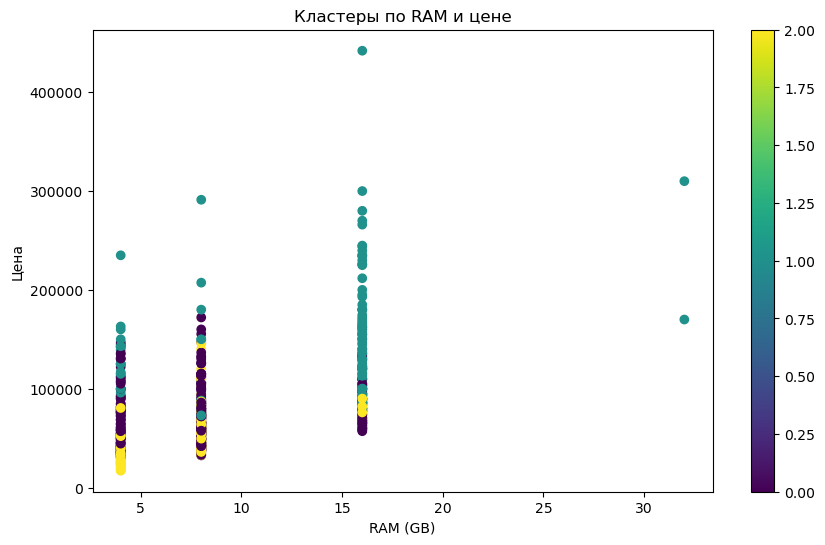

In [588]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(df['ram_gb'], df['price'], c=df['Cluster'], cmap='viridis')
plt.title('Кластеры по RAM и цене')
plt.xlabel('RAM (GB)')
plt.ylabel('Цена')
plt.colorbar()
plt.show()

In [589]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,touchscreen,price,rating,number_of_ratings,number_of_reviews,Cluster
0,101,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,34649,2,3,0,2
1,102,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,38999,3,65,5,2
2,102,201,301,10,4.0,4,0.0,1024.0,1,64,0.0,0,39999,3,8,1,2
3,101,201,302,10,8.0,4,512.0,0.0,1,32,2.0,0,69990,3,0,0,0
4,101,201,303,0,4.0,4,0.0,512.0,1,64,0.0,0,26990,3,0,0,2


# Обучение моделей

#### Модель для предсказания цены (RandomForestRegressor)

In [614]:
X = df.drop(['price', 'rating', 'rating_category', 'Cluster'], axis=1)  # Удаляем ненужные столбцы
y = df['price']

In [616]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Инициализация и обучение модели
model_regressor = RandomForestRegressor(random_state=42)
model_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [618]:
# Прогнозирование
y_pred = model_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 561746409.8449392
R² Score: 0.7359305610788098


#### Модель для классификации по рейтингу (RandomForestClassifier)

In [620]:
df['rating_category'] = pd.cut(df['rating'], bins=[-1, 1, 3, 5], labels=['низкий', 'средний', 'высокий'])
y_class = df['rating_category']

In [622]:
# Разделение данных на обучающую и тестовую выборки
X_class = df.drop(['rating', 'rating_category', 'price', 'Cluster'], axis=1)  # Удаляем ненужные столбцы
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [624]:
# Инициализация и обучение модели
model_classifier = RandomForestClassifier(random_state=42)
model_classifier.fit(X_train_class, y_train_class)
# Прогнозирование
y_pred_class = model_classifier.predict(X_test_class)

In [626]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

     высокий       0.90      0.95      0.92        99
      низкий       0.00      0.00      0.00         1
     средний       0.91      0.84      0.87        61

    accuracy                           0.90       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.90      0.90      0.90       161



# Вывод

#### 1. Целевая переменная:
   ##### В данном анализе целевой переменной был цена ноутбуков, которая использовалась для классификации.

#### 2. Кластеризация:
   ##### Кластеризация с использованием метода K-means позволила выделить три группы ноутбуков, которые различаются по объему оперативной памяти и цене.

#### 4. Модели:
   ##### RandomForestClassifier показал хорошие результаты в классификации ноутбуков по рейтингу. Модель достигла высокой точности (accuracy) на уровне 90%, что говорит о ее эффективности в предсказании рейтинга на основе характеристик ноутбука.Однако, модель не смогла корректно классифицировать ноутбуки с низким рейтингом (precision и recall для класса "низкий" равны 0), что может быть связано с недостаточным количеством данных для этого класса.

#### 5. Итог:
   ##### В ходе анализа данных были выявлены ключевые зависимости между характеристиками ноутбуков и их ценой. Кластеризация позволила выделить группы ноутбуков с похожими параметрами, что может быть полезно для сегментации рынка. Модель RandomForestClassifier показала себя хорошо в задаче классификации по рейтингу, однако требует доработки для улучшения предсказаний для класса с низким рейтингом.